In [146]:
# teamname_projectname.ipynb

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
# Load the data
google_ads = pd.read_csv('Train Data/googleads-performance.csv')
# meta_ads = pd.read_csv('Train Data/metaads-performance.csv')
microsoft_ads = pd.read_csv('Train Data/microsoftads-performance.csv')
# website_landing = pd.read_csv('Train Data/website-landings.csv')

In [148]:
# Combine data
ads_data = pd.concat([google_ads, microsoft_ads], axis=0)

In [149]:
# Convert Date to datetime
ads_data['Date'] = pd.to_datetime(ads_data['Date'])

In [150]:
ads_data = ads_data.drop(['Date', 'Campaign type'], axis=1)
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 720
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Impressions  1435 non-null   float64
 1   Clicks       1435 non-null   object 
 2   Cost         1435 non-null   float64
 3   Conversions  1435 non-null   float64
 4   Revenue      1435 non-null   float64
dtypes: float64(4), object(1)
memory usage: 67.3+ KB


In [151]:
print(ads_data.isna().sum())

Impressions    0
Clicks         0
Cost           0
Conversions    0
Revenue        0
dtype: int64


In [152]:
# ads_data = pd.to_numeric(ads_data)
ads_data['Clicks'] = pd.to_numeric(ads_data['Clicks'], errors='coerce')

In [153]:
ads_data['Clicks'] = ads_data['Clicks'].fillna(0)

In [154]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 720
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Impressions  1435 non-null   float64
 1   Clicks       1435 non-null   float64
 2   Cost         1435 non-null   float64
 3   Conversions  1435 non-null   float64
 4   Revenue      1435 non-null   float64
dtypes: float64(5)
memory usage: 67.3 KB


In [155]:
# Define features and target
features = ['Impressions', 'Clicks', 'Cost']
target = 'Conversions'

In [156]:

X = ads_data[features]
y = ads_data[target]


In [157]:
print(ads_data.isna().sum())

Impressions    0
Clicks         0
Cost           0
Conversions    0
Revenue        0
dtype: int64


In [158]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
X_train.count(), y_train.count()

(Impressions    1148
 Clicks         1148
 Cost           1148
 dtype: int64,
 1148)

In [160]:
X_test.count(), y_test.count()

(Impressions    287
 Clicks         287
 Cost           287
 dtype: int64,
 287)

In [161]:
# Train a Gradient Boosting Regressor model
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}

gbr = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gbr, param_grid=params, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [162]:
# Predict on the test set
y_pred = best_model.predict(X_test)


In [163]:
len(y_pred)

287

In [164]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 30.291928887858223
Mean Absolute Error: 3.0885421582236634
R^2 Score: 0.8976810867983543


In [165]:
X_test.count(), y_test.count(), len(y_pred)

(Impressions    287
 Clicks         287
 Cost           287
 dtype: int64,
 287,
 287)

In [166]:
y_pred = list(y_pred)

In [167]:
# plt.plot(X_test,y_test)
# sns.scatterplot(X_test, y_test) # X_train size = 1148 y_test = 287


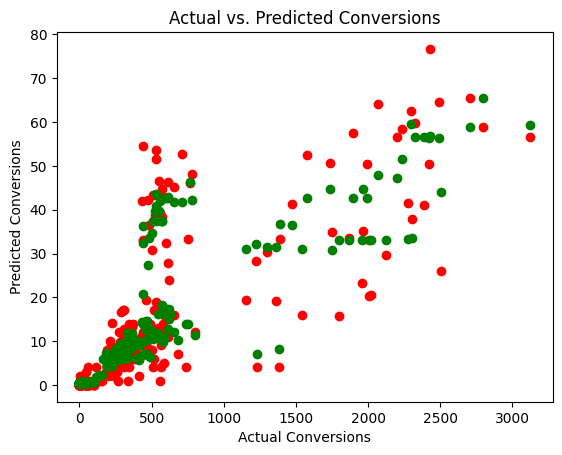

In [168]:
# Visualize the predictions
plt.scatter(X_test['Clicks'], y_test, c='r') # X_train size = 1148 y_test = 287
plt.scatter(X_test['Clicks'], y_pred, c='g')
plt.xlabel('Actual Conversions')
plt.ylabel('Predicted Conversions')
plt.title('Actual vs. Predicted Conversions')
plt.show()

In [169]:

# Define the total budget and minimum allocation per channel
total_budget = 200000
min_allocation = total_budget * 0.10


In [170]:
# Use the model to predict conversions for each channel
ads_data['PredictedConversions'] = best_model.predict(ads_data[features])